In [1]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais shared room_mex.csv')
df

listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate host_acceptance_rate  \
0    a few days or more               100%                  92%   
1    a few days or more                 0%                   0%   
2    within a few hours               100%                  85%   
3    within a few hours               100%                  31%   
4    within a few hours               100%                  94%   
..                  ...                ...                  ...   
396      within an hour               100%                 100%   
397      within an hour               100%                 100%   
398      within an hour               100%                 100%   
399  a few days or more               100%                  92%   
400      within an hour               100%                 100%   

    host_is_superhost                host_verifications  \
0                   f                ['email', 'phone']   
1                   f                ['email', 'phone']   
2                   t                ['email', 'phone']   
3                   f                ['email', 'phone']   
4                   t  ['email', 'phone', 'work_email']   
..                ...                               ...   
396                 f                ['email', 'phone']   
397                 f                ['email', 'phone']   
398                 f                ['email', 'phone']   
399                 f                ['email', 'phone']   
400                 f                ['email', 'phone']   

    neighbourhood_cleansed               property_type    room_type  ...  \
0               Cuauhtémoc  Shared room in rental unit  Shared room  ...   
1               Cuauhtémoc         Shared room in loft  Shared room  ...   
2               Cuauhtémoc   Shared room in guesthouse  Shared room  ...   
3               Cuauhtémoc       Shared room in hostel  Shared room  ...   
4      Venustiano Carranza         Shared room in home  Shared room  ...   
..                     ...                         ...          ...  ...   
396    Venustiano Carranza         Shared room in home  Shared room  ...   
397              Iztacalco  Shared room in rental unit  Shared room  ...   
398              Iztacalco  Shared room in rental unit  Shared room  ...   
399                Tlalpan   Shared room in guesthouse  Shared room  ...   
400              Iztacalco  Shared room in rental unit  Shared room  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        4.84                  4.80   
1                        4.84                  4.80   
2                        4.47                  4.74   
3                        4.84                  4.80   
4                        4.93                  4.94   
..                        ...                   ...   
396                      4.84                  4.80   
397                      4.84                  4.80   
398                      4.84                  4.80   
399                      5.00                  5.00   
400                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          4.80                

**price vs host_acceptance rate**

In [3]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [4]:
# Remover comas y convertir a tipo float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

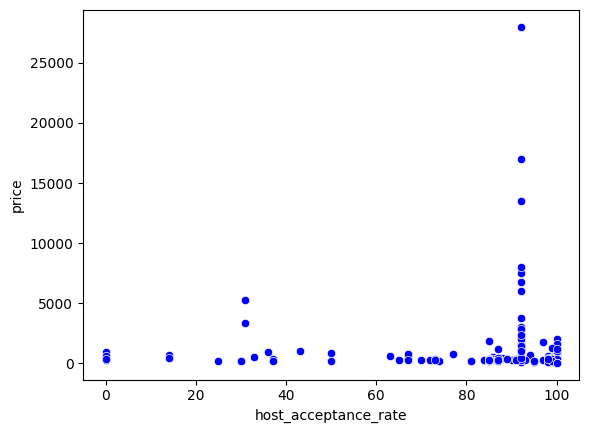

In [5]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [6]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [10]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.85558393]),
 'rank_': 1,
 'singular_': array([546.08764015]),
 'intercept_': 366.6163263682791}

In [11]:
model.score(Vars_Indep,Vars_Dep)

0.001656314877999332

In [12]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([629.33004784, 366.61632637, 609.34096033, 455.13942817,
       635.04121569, 629.33004784, 643.60796748, 629.33004784,
       455.13942817, 438.00592459, 652.17471927, 629.33004784,
       575.07395318, 575.07395318, 629.33004784, 629.33004784,
       652.17471927, 629.33004784, 629.33004784, 629.33004784,
       546.51811389, 629.33004784, 557.94044961, 629.33004784,
       629.33004784, 629.33004784, 629.33004784, 557.94044961,
       629.33004784, 649.31913534, 649.31913534, 649.31913534,
       649.31913534, 649.31913534, 652.17471927, 617.90771212,
       649.31913534, 652.17471927, 635.04121569, 649.31913534,
       649.31913534, 649.31913534, 649.31913534, 649.31913534,
       629.33004784, 366.61632637, 629.33004784, 629.33004784,
       629.33004784, 629.33004784, 652.17471927, 652.17471927,
       652.17471927, 652.17471927, 629.33004784, 643.60796748,
       629.33004784, 652.17471927, 649.31913534, 649.31913534,
       649.31913534, 629.33004784, 629.33004784, 609.34

In [13]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones                                       listing_url  \
0      629.330048               https://www.airbnb.com/rooms/617137   
1      366.616326              https://www.airbnb.com/rooms/3197924   
2      609.340960              https://www.airbnb.com/rooms/5434219   
3      455.139428              https://www.airbnb.com/rooms/6972071   
4      635.041216              https://www.airbnb.com/rooms/6076798   
..            ...                                               ...   
396    652.174719  https://www.airbnb.com/rooms/1239163343779403019   
397    652.174719  https://www.airbnb.com/rooms/1245764268727921299   
398    652.174719  https://www.airbnb.com/rooms/1246455131724928238   
399    629.330048  https://www.airbnb.com/rooms/1248058667744084823   
400    652.174719  https://www.airbnb.com/rooms/1251003920085208093   

     host_since  host_response_time host_response_rate  host_acceptance_rate  \
0    2012-07-26  a few days or more               100%                  92.0   
1    2014-05-30  a few days or more                 0%                   0.0   
2    2015-02-22  within a few hours               100%                  85.0   
3    2015-06-09  within a few hours               100%                  31.0   
4    2015-04-17  within a few hours               100%                  94.0   
..          ...                 ...                ...                   ...   
396  2016-03-19      within an hour               100%                 100.0   
397  2019-02-19      within an hour               100%                 100.0   
398  2019-02-19      within an hour               100%                 100.0   
399  2024-09-17  a few days or more               100%                  92.0   
400  2019-02-19      within an hour               100%                 100.0   

    host_is_superhost                host_verifications  \
0                   f                ['email', 'phone']   
1                   f                ['email', 'phone']   
2                   t                ['email', 'phone']   
3                   f                ['email', 'phone']   
4                   t  ['email', 'phone', 'work_email']   
..                ...                               ...   
396                 f                ['email', 'phone']   
397                 f                ['email', 'phone']   
398                 f                ['email', 'phone']   
399                 f                ['email', 'phone']   
400                 f                ['email', 'phone']   

    neighbourhood_cleansed               property_type  ...  \
0               Cuauhtémoc  Shared room in rental unit  ...   
1               Cuauhtémoc         Shared room in loft  ...   
2               Cuauhtémoc   Shared room in guesthouse  ...   
3               Cuauhtémoc       Shared room in hostel  ...   
4      Venustiano Carranza         Shared room in home  ...   
..                     ...                         ...  ...   
396    Venustiano Carranza         Shared room in home  ...   
397              Iztacalco  Shared room in rental unit  ...   
398              Iztacalco  Shared room in rental unit  ...   
399                Tlalpan   Shared room in guesthouse  ...   
400              Iztacalco  Shared room in rental unit  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        4.84                  4.80   
1                        4.84                  4.80   
2                        4.47                  4.74   
3                        4.84                  4.80   
4                        4.93                  4.94   
..                        ...                   ...   
396                      4.84                  4.80   
397                      4.84                  4.80   
398                      4.84                  4.80   
399                      5.00                  5.00   
400                      4.84                  4.80   

    review_scores_communication  review_scores_location review_s

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

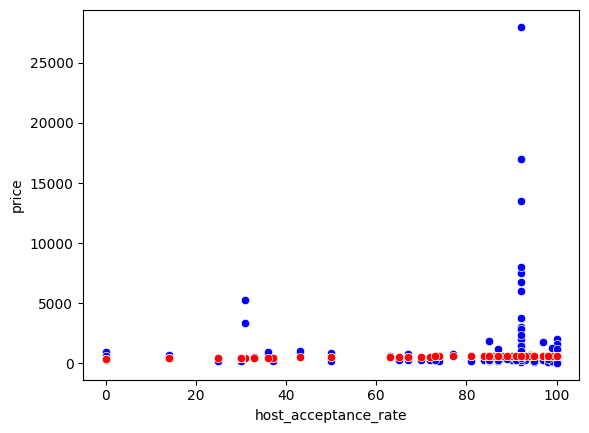

In [14]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [15]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.001656314877999332

In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.040697848567207234

**Price vs host_is_superhost**

In [17]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

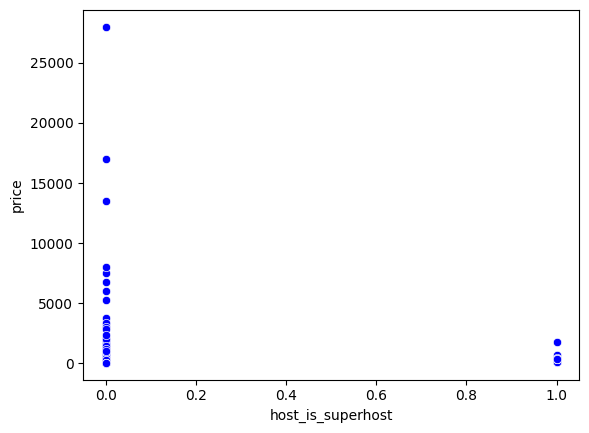

In [18]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [19]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [21]:
#Veerficamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [23]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-356.36357136]),
 'rank_': 1,
 'singular_': array([7.47030697]),
 'intercept_': 659.7964071856287}

In [24]:
model1.score(Vars_Indep1,Vars_Dep1)

0.00482716176407938

In [25]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([659.79640719, 659.79640719, 303.43283582, 659.79640719,
       303.43283582, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 303.43283582,
       659.79640719, 659.79640719, 659.79640719, 659.79640719,
       659.79640719, 659.79640719, 659.79640719, 659.79

In [26]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones  \
0       659.796407    629.330048   
1       659.796407    366.616326   
2       303.432836    609.340960   
3       659.796407    455.139428   
4       303.432836    635.041216   
..             ...           ...   
396     659.796407    652.174719   
397     659.796407    652.174719   
398     659.796407    652.174719   
399     659.796407    629.330048   
400     659.796407    652.174719   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate  host_acceptance_rate  \
0    a few days or more               100%                  92.0   
1    a few days or more                 0%                   0.0   
2    within a few hours               100%                  85.0   
3    within a few hours               100%                  31.0   
4    within a few hours               100%                  94.0   
..                  ...                ...                   ...   
396      within an hour               100%                 100.0   
397      within an hour               100%                 100.0   
398      within an hour               100%                 100.0   
399  a few days or more               100%                  92.0   
400      within an hour               100%                 100.0   

     host_is_superhost                host_verifications  \
0                    0                ['email', 'phone']   
1                    0                ['email', 'phone']   
2                    1                ['email', 'phone']   
3                    0                ['email', 'phone']   
4                    1  ['email', 'phone', 'work_email']   
..                 ...                               ...   
396                  0                ['email', 'phone']   
397                  0                ['email', 'phone']   
398                  0                ['email', 'phone']   
399                  0                ['email', 'phone']   
400                  0                ['email', 'phone']   

    neighbourhood_cleansed  ... review_scores_cleanliness  \
0               Cuauhtémoc  ...                      4.84   
1               Cuauhtémoc  ...                      4.84   
2               Cuauhtémoc  ...                      4.47   
3               Cuauhtémoc  ...                      4.84   
4      Venustiano Carranza  ...                      4.93   
..                     ...  ...                       ...   
396    Venustiano Carranza  ...                      4.84   
397              Iztacalco  ...                      4.84   
398              Iztacalco  ...                      4.84   
399                Tlalpan  ...                      5.00   
400              Iztacalco  ...                      4.84   

    review_scores_checkin review_scores_communication review_scores_location  \
0                    4.80                        4.80                   4.80   
1                    4.80                        4.80                   4.80   
2                    4.74                        4.71                   4.71   
3                    4.80                        4.80                   4.80   
4                    4.94                        4.91                   

<Axes: xlabel='host_is_superhost', ylabel='price'>

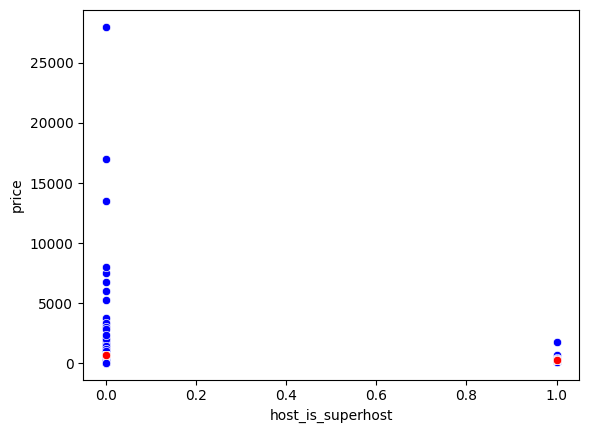

In [27]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

0.00482716176407938

In [29]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.06947777892304402

**bathrooms vs accommodates**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

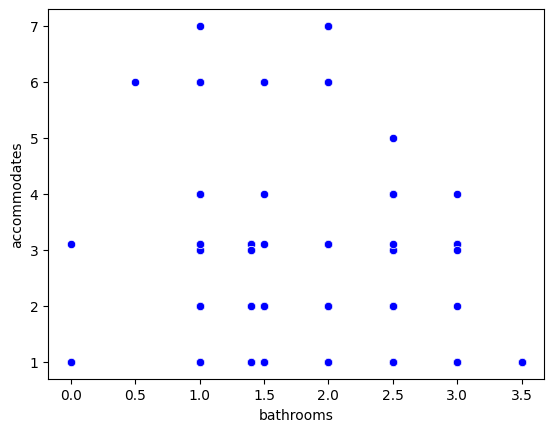

In [30]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [31]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [32]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [33]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [34]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [35]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1336777]),
 'rank_': 1,
 'singular_': array([14.70312027]),
 'intercept_': 1.422292028689262}

In [36]:
model2.score(Vars_Indep2,Vars_Dep2)

0.0068101579803336865

In [37]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([1.55596973, 1.62280858, 1.60944081, 1.60944081, 1.82332513,
       1.55596973, 1.60944081, 1.55596973, 1.55596973, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.55596973, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.55596973, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.62280858, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.55596973, 1.62280858,
       1.62280858, 1.55596973, 1.62280858, 1.62280858, 1.55596973,
       1.55596973, 1.62280858, 1.62280858, 1.62280858, 1.62280858,
       1.55596973, 1.62280858, 1.55596973, 1.62280858, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.55596973, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.55596973, 1.55596973,
       1.68964743, 1.55596973, 1.55596973, 1.55596973, 1.55596973,
       1.55596973, 1.55596973, 1.55596973, 1.42229203, 1.75648628,
       1.55596973, 1.75648628, 1.82332513, 1.55596973, 1.60944081,
       1.60944081, 1.60944081, 1.60944081, 1.60944081, 1.60944

In [38]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones  \
0         1.555970     659.796407    629.330048   
1         1.622809     659.796407    366.616326   
2         1.609441     303.432836    609.340960   
3         1.609441     659.796407    455.139428   
4         1.823325     303.432836    635.041216   
..             ...            ...           ...   
396       1.555970     659.796407    652.174719   
397       1.555970     659.796407    652.174719   
398       1.555970     659.796407    652.174719   
399       1.756486     659.796407    629.330048   
400       1.555970     659.796407    652.174719   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate  host_acceptance_rate  \
0    a few days or more               100%                  92.0   
1    a few days or more                 0%                   0.0   
2    within a few hours               100%                  85.0   
3    within a few hours               100%                  31.0   
4    within a few hours               100%                  94.0   
..                  ...                ...                   ...   
396      within an hour               100%                 100.0   
397      within an hour               100%                 100.0   
398      within an hour               100%                 100.0   
399  a few days or more               100%                  92.0   
400      within an hour               100%                 100.0   

     host_is_superhost                host_verifications  ...  \
0                    0                ['email', 'phone']  ...   
1                    0                ['email', 'phone']  ...   
2                    1                ['email', 'phone']  ...   
3                    0                ['email', 'phone']  ...   
4                    1  ['email', 'phone', 'work_email']  ...   
..                 ...                               ...  ...   
396                  0                ['email', 'phone']  ...   
397                  0                ['email', 'phone']  ...   
398                  0                ['email', 'phone']  ...   
399                  0                ['email', 'phone']  ...   
400                  0                ['email', 'phone']  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        4.84                  4.80   
1                        4.84                  4.80   
2                        4.47                  4.74   
3                        4.84                  4.80   
4                        4.93                  4.94   
..                        ...                   ...   
396                      4.84                  4.80   
397                      4.84                  4.80   
398                      4.84                  4.80   
399                      5.00                  5.00   
400                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          4.80                   4.80                4.70   
1                          4.80                   4.80                4.70   
2                          4.71                   4.71                

<Axes: xlabel='bathrooms', ylabel='accommodates'>

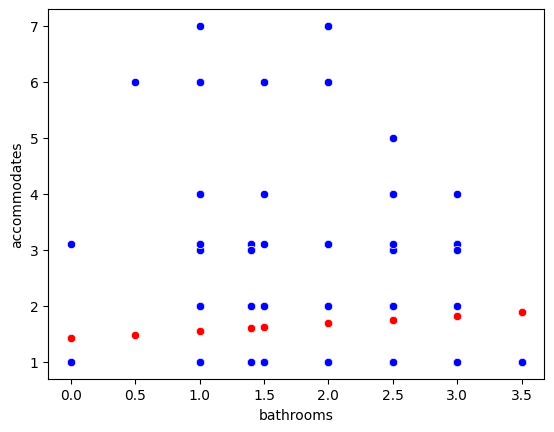

In [39]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [40]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.0068101579803336865

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.08252368133047439

**Price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

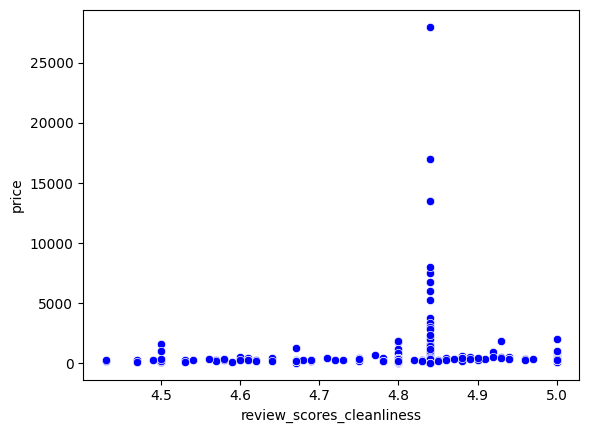

In [42]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [43]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [45]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [47]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([236.93546749]),
 'rank_': 1,
 'singular_': array([2.59820723]),
 'intercept_': -544.386197088089}

In [48]:
model3.score(Vars_Indep3,Vars_Dep3)

0.00025812857045681703

In [49]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([602.38146554, 602.38146554, 514.71534257, 602.38146554,
       623.70565762, 602.38146554, 531.3008253 , 602.38146554,
       602.38146554, 521.8234066 , 621.33630294, 602.38146554,
       592.90404684, 592.90404684, 602.38146554, 602.38146554,
       640.29114034, 602.38146554, 640.29114034, 602.38146554,
       611.85888424, 602.38146554, 611.85888424, 602.38146554,
       602.38146554, 602.38146554, 602.38146554, 554.99437205,
       602.38146554, 592.90404684, 592.90404684, 519.45405192,
       592.90404684, 592.90404684, 592.90404684, 640.29114034,
       505.23792387, 597.64275619, 585.79598282, 592.90404684,
       562.10243607, 566.84114542, 600.01211087, 592.90404684,
       602.38146554, 592.90404684, 602.38146554, 602.38146554,
       602.38146554, 602.38146554, 592.90404684, 543.14759867,
       592.90404684, 562.10243607, 602.38146554, 592.90404684,
       602.38146554, 514.71534257, 592.90404684, 607.12017489,
       592.90404684, 602.38146554, 602.38146554, 623.70

In [50]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0       602.381466       1.555970     659.796407    629.330048   
1       602.381466       1.622809     659.796407    366.616326   
2       514.715343       1.609441     303.432836    609.340960   
3       602.381466       1.609441     659.796407    455.139428   
4       623.705658       1.823325     303.432836    635.041216   
..             ...            ...            ...           ...   
396     602.381466       1.555970     659.796407    652.174719   
397     602.381466       1.555970     659.796407    652.174719   
398     602.381466       1.555970     659.796407    652.174719   
399     640.291140       1.756486     659.796407    629.330048   
400     602.381466       1.555970     659.796407    652.174719   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate  host_acceptance_rate  \
0    a few days or more               100%                  92.0   
1    a few days or more                 0%                   0.0   
2    within a few hours               100%                  85.0   
3    within a few hours               100%                  31.0   
4    within a few hours               100%                  94.0   
..                  ...                ...                   ...   
396      within an hour               100%                 100.0   
397      within an hour               100%                 100.0   
398      within an hour               100%                 100.0   
399  a few days or more               100%                  92.0   
400      within an hour               100%                 100.0   

     host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                    0  ...                      4.84                  4.80   
1                    0  ...                      4.84                  4.80   
2                    1  ...                      4.47                  4.74   
3                    0  ...                      4.84                  4.80   
4                    1  ...                      4.93                  4.94   
..                 ...  ...                       ...                   ...   
396                  0  ...                      4.84                  4.80   
397                  0  ...                      4.84                  4.80   
398                  0  ...                      4.84                  4.80   
399                  0  ...                      5.00                  5.00   
400                  0  ...                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          4.80                   4.80                4.70   
1                          4.80                   4.80                4.70   
2                          4.71                   4.71                4.59   
3                          4.80                   4.80                4.70   
4                          4.91                   4.69                4.93   
..                          ...                    ...                 ...   
396                        4.80                   4.80                4

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

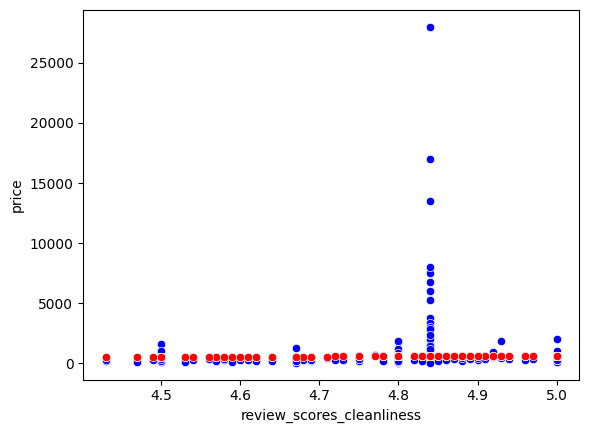

In [51]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.00025812857045681703

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.0160663801292269

**price vs instant_bookable**

In [54]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

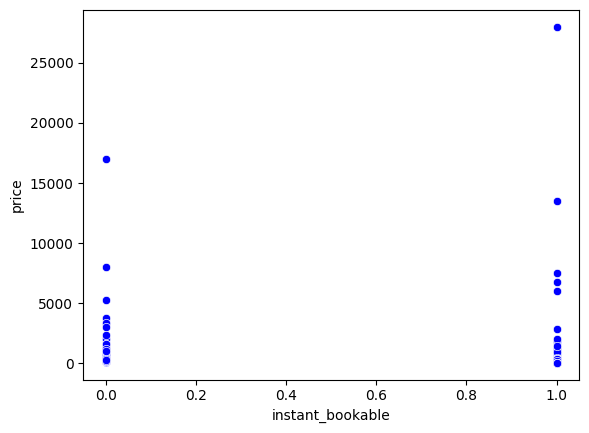

In [55]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [56]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [57]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [58]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [59]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [60]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([128.18779049]),
 'rank_': 1,
 'singular_': array([9.98977033]),
 'intercept_': 531.8449197860962}

In [61]:
model5.score(Vars_Indep5,Vars_Dep5)

0.0011169472974895678

In [62]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([531.84491979, 660.03271028, 531.84491979, 531.84491979,
       660.03271028, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 660.03271028, 660.03271028, 531.84491979,
       531.84491979, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 660.03271028, 660.03271028, 660.03271028,
       660.03271028, 660.03271028, 660.03271028, 531.84491979,
       660.03271028, 660.03271028, 660.03271028, 660.03271028,
       660.03271028, 660.03271028, 660.03271028, 660.03271028,
       531.84491979, 531.84491979, 531.84491979, 531.84491979,
       531.84491979, 531.84491979, 660.03271028, 660.03271028,
       531.84491979, 660.03271028, 531.84491979, 660.03271028,
       531.84491979, 660.03271028, 660.03271028, 660.03271028,
       660.03271028, 531.84491979, 531.84491979, 660.03

In [63]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0        531.84492     602.381466       1.555970     659.796407    629.330048   
1        660.03271     602.381466       1.622809     659.796407    366.616326   
2        531.84492     514.715343       1.609441     303.432836    609.340960   
3        531.84492     602.381466       1.609441     659.796407    455.139428   
4        660.03271     623.705658       1.823325     303.432836    635.041216   
..             ...            ...            ...            ...           ...   
396      531.84492     602.381466       1.555970     659.796407    652.174719   
397      660.03271     602.381466       1.555970     659.796407    652.174719   
398      660.03271     602.381466       1.555970     659.796407    652.174719   
399      531.84492     640.291140       1.756486     659.796407    629.330048   
400      660.03271     602.381466       1.555970     659.796407    652.174719   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate  host_acceptance_rate  ...  \
0    a few days or more               100%                  92.0  ...   
1    a few days or more                 0%                   0.0  ...   
2    within a few hours               100%                  85.0  ...   
3    within a few hours               100%                  31.0  ...   
4    within a few hours               100%                  94.0  ...   
..                  ...                ...                   ...  ...   
396      within an hour               100%                 100.0  ...   
397      within an hour               100%                 100.0  ...   
398      within an hour               100%                 100.0  ...   
399  a few days or more               100%                  92.0  ...   
400      within an hour               100%                 100.0  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.84                  4.80   
1                         4.84                  4.80   
2                         4.47                  4.74   
3                         4.84                  4.80   
4                         4.93                  4.94   
..                         ...                   ...   
396                       4.84                  4.80   
397                       4.84                  4.80   
398                       4.84                  4.80   
399                       5.00                  5.00   
400                       4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          4.80                   4.80                4.70   
1                          4.80                   4.80                4.70   
2                          4.71                   4.71                4.59   
3                          4.80                   4.80                4.70   
4                          4.91                   4.69                4.93   
..                          ...                    ...                 ...   
396                        4.80                   4.80                4.70   
397                        4.

<Axes: xlabel='instant_bookable', ylabel='price'>

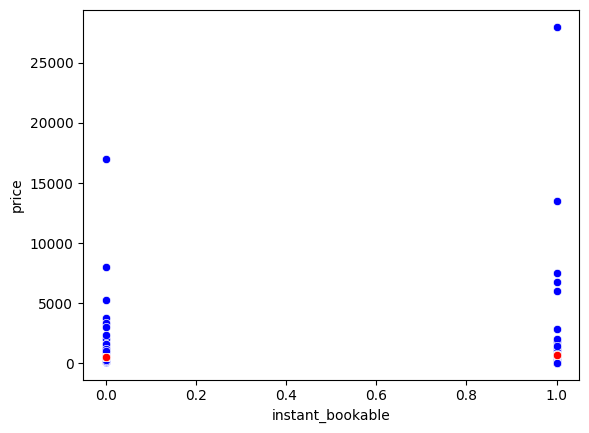

In [64]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.0011169472974895678

In [66]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.03342076147381397

**price vs property_type**

In [67]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Shared room in rental unit', 'Shared room in loft',
       'Shared room in guesthouse', 'Shared room in hostel',
       'Shared room in home', 'Shared room in guest suite',
       'Shared room in dorm', 'Shared room in condo',
       'Shared room in hotel', 'Shared room in tiny home',
       'Shared room in cabin', 'Shared room in serviced apartment',
       'Shared room in tent', 'Shared room in bed and breakfast',
       'Shared room in casa particular', 'Shared room in townhouse',
       'Shared room in farm stay', 'Shared room in boutique hotel'],
      dtype=object)

In [68]:
# Crear un diccionario de mapeo basado en los nuevos tipos de habitación proporcionados
tipo_a_numero = {
    'Shared room in rental unit': 1,
    'Shared room in loft': 2,
    'Shared room in guesthouse': 3,
    'Shared room in hostel': 4,
    'Shared room in home': 5,
    'Shared room in guest suite': 6,
    'Shared room in dorm': 7,
    'Shared room in condo': 8,
    'Shared room in hotel': 9,
    'Shared room in tiny home': 10,
    'Shared room in cabin': 11,
    'Shared room in serviced apartment': 12,
    'Shared room in tent': 13,
    'Shared room in bed and breakfast': 14,
    'Shared room in casa particular': 15,
    'Shared room in townhouse': 16,
    'Shared room in farm stay': 17,
    'Shared room in boutique hotel': 18
}

# Aplicar el mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)


In [69]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

<Axes: xlabel='property_type_numerico', ylabel='price'>

In [70]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [71]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [72]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [73]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [74]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-13.01336243]),
 'rank_': 1,
 'singular_': array([72.82010766]),
 'intercept_': 664.1528943148311}

In [75]:
model6.score(Vars_Indep6,Vars_Dep6)

0.0006116599353197527

In [76]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([651.13953189, 638.12616946, 625.11280703, 612.0994446 ,
       599.08608218, 651.13953189, 612.0994446 , 651.13953189,
       612.0994446 , 599.08608218, 599.08608218, 651.13953189,
       586.07271975, 599.08608218, 599.08608218, 651.13953189,
       651.13953189, 599.08608218, 651.13953189, 651.13953189,
       651.13953189, 586.07271975, 651.13953189, 599.08608218,
       573.05935732, 586.07271975, 599.08608218, 651.13953189,
       651.13953189, 612.0994446 , 612.0994446 , 612.0994446 ,
       612.0994446 , 612.0994446 , 651.13953189, 560.04599489,
       612.0994446 , 651.13953189, 599.08608218, 612.0994446 ,
       612.0994446 , 612.0994446 , 612.0994446 , 612.0994446 ,
       599.08608218, 651.13953189, 599.08608218, 599.08608218,
       599.08608218, 651.13953189, 651.13953189, 651.13953189,
       651.13953189, 651.13953189, 599.08608218, 651.13953189,
       599.08608218, 651.13953189, 547.03263247, 547.03263247,
       547.03263247, 651.13953189, 599.08608218, 612.09

In [77]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0       651.139532      531.84492     602.381466       1.555970   
1       638.126169      660.03271     602.381466       1.622809   
2       625.112807      531.84492     514.715343       1.609441   
3       612.099445      531.84492     602.381466       1.609441   
4       599.086082      660.03271     623.705658       1.823325   
..             ...            ...            ...            ...   
396     599.086082      531.84492     602.381466       1.555970   
397     651.139532      660.03271     602.381466       1.555970   
398     651.139532      660.03271     602.381466       1.555970   
399     625.112807      531.84492     640.291140       1.756486   
400     651.139532      660.03271     602.381466       1.555970   

     Predicciones1  Predicciones  \
0       659.796407    629.330048   
1       659.796407    366.616326   
2       303.432836    609.340960   
3       659.796407    455.139428   
4       303.432836    635.041216   
..             ...           ...   
396     659.796407    652.174719   
397     659.796407    652.174719   
398     659.796407    652.174719   
399     659.796407    629.330048   
400     659.796407    652.174719   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/617137  2012-07-26   
1                https://www.airbnb.com/rooms/3197924  2014-05-30   
2                https://www.airbnb.com/rooms/5434219  2015-02-22   
3                https://www.airbnb.com/rooms/6972071  2015-06-09   
4                https://www.airbnb.com/rooms/6076798  2015-04-17   
..                                                ...         ...   
396  https://www.airbnb.com/rooms/1239163343779403019  2016-03-19   
397  https://www.airbnb.com/rooms/1245764268727921299  2019-02-19   
398  https://www.airbnb.com/rooms/1246455131724928238  2019-02-19   
399  https://www.airbnb.com/rooms/1248058667744084823  2024-09-17   
400  https://www.airbnb.com/rooms/1251003920085208093  2019-02-19   

     host_response_time host_response_rate  ...  review_scores_checkin  \
0    a few days or more               100%  ...                   4.80   
1    a few days or more                 0%  ...                   4.80   
2    within a few hours               100%  ...                   4.74   
3    within a few hours               100%  ...                   4.80   
4    within a few hours               100%  ...                   4.94   
..                  ...                ...  ...                    ...   
396      within an hour               100%  ...                   4.80   
397      within an hour               100%  ...                   4.80   
398      within an hour               100%  ...                   4.80   
399  a few days or more               100%  ...                   5.00   
400      within an hour               100%  ...                   4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.80                   4.80                4.70   
1                           4.80                   4.80                4.70   
2                           4.71                   4.71                4.59   
3                           4.80                   4.80                4.70   
4                           4.91                   4.69                4.93   
..                           ...                    ...                 ...   
396                         4.80                   4.80                4.70   
397                         4.80                   4.80                4.70   
398                         4.80                   4.80                4.70   
399                         5.00                   5.00                5.00   
400                         4.80                   4.80                4.70   

    calculated_host_listings_count  \
0                              1.0   
1                       

<Axes: xlabel='property_type_numerico', ylabel='price'>

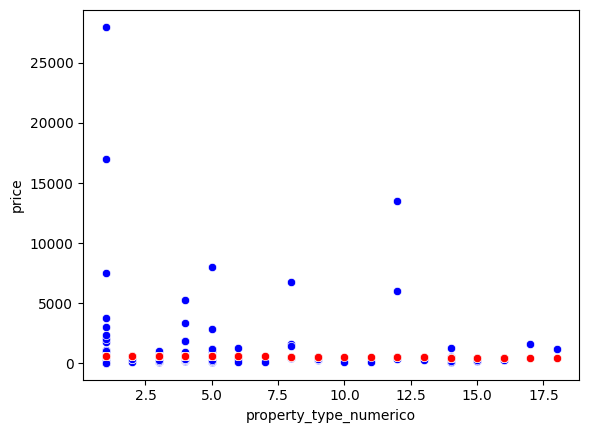

In [78]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0006116599353197527

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.024731759648673458

**Mapa de calor**

In [81]:
# Utilizar el método select_dtypes para seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
df_numerico

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0       651.139532      531.84492     602.381466       1.555970   
1       638.126169      660.03271     602.381466       1.622809   
2       625.112807      531.84492     514.715343       1.609441   
3       612.099445      531.84492     602.381466       1.609441   
4       599.086082      660.03271     623.705658       1.823325   
..             ...            ...            ...            ...   
396     599.086082      531.84492     602.381466       1.555970   
397     651.139532      660.03271     602.381466       1.555970   
398     651.139532      660.03271     602.381466       1.555970   
399     625.112807      531.84492     640.291140       1.756486   
400     651.139532      660.03271     602.381466       1.555970   

     Predicciones1  Predicciones  host_acceptance_rate  host_is_superhost  \
0       659.796407    629.330048                  92.0                  0   
1       659.796407    366.616326                   0.0                  0   
2       303.432836    609.340960                  85.0                  1   
3       659.796407    455.139428                  31.0                  0   
4       303.432836    635.041216                  94.0                  1   
..             ...           ...                   ...                ...   
396     659.796407    652.174719                 100.0                  0   
397     659.796407    652.174719                 100.0                  0   
398     659.796407    652.174719                 100.0                  0   
399     659.796407    629.330048                  92.0                  0   
400     659.796407    652.174719                 100.0                  0   

      price  instant_bookable  ...  review_scores_checkin  \
0     120.0                 0  ...                   4.80   
1     640.0                 1  ...                   4.80   
2     290.0                 0  ...                   4.74   
3    5314.0                 0  ...                   4.80   
4     550.0                 1  ...                   4.94   
..      ...               ...  ...                    ...   
396  1200.0                 0  ...                   4.80   
397    70.0                 1  ...                   4.80   
398    70.0                 1  ...                   4.80   
399  1058.0                 0  ...                   5.00   
400    50.0                 1  ...                   4.80   

     review_scores_communication  review_scores_location  review_scores_value  \
0                           4.80                    4.80                 4.70   
1                           4.80                    4.80                 4.70   
2                           4.71                    4.71                 4.59   
3                           4.80                    4.80                 4.70   
4                           4.91                    4.69                 4.93   
..                           ...                     ...                  ...   
396                         4.80                    4.80                 4.70   
397                         4.80                    4.80                 4.70   
398                         4.80                    4.80                 4.70   
399                         5.00                    5.00                 5.00   
400                         4.80                    4.80                 4.70   

     calculated_host_listings_count  \
0                               1.0   
1                               3.0   
2                               2.0   
3                              19.0   
4                               1.0   
..                              ...   
396                             4.0   
397                             4.0   
398                             4.0   
399                             1.0   
400                             4.0   

     calculated_host_listings_count_entire_homes  \
0                                            0.0

In [82]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df_numerico.corr()
Corr_Factors

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000      -0.155627   
Predicciones5                                     -0.155627       1.000000   
Predicciones3                                     -0.039412      -0.067762   
Predicciones2                                     -0.123986      -0.093910   
Predicciones1                                     -0.062474      -0.177475   
Predicciones                                      -0.093156       0.544235   
host_acceptance_rate                              -0.093156       0.544235   
host_is_superhost                                  0.062474       0.177475   
price                                              0.024732       0.033421   
instant_bookable                                  -0.155627       1.000000   
id                                                -0.046789       0.207347   
host_id                                           -0.160787      -0.063482   
host_listings_count                               -0.073183       0.300717   
host_total_listings_count                         -0.037793       0.241492   
latitude                                          -0.048417      -0.211373   
longitude                                          0.069346       0.143374   
accommodates                                      -0.095117      -0.081750   
bathrooms                                         -0.123986      -0.093910   
bedrooms                                          -0.002339       0.032709   
beds                                               0.045492       0.014626   
minimum_nights                                     0.073912      -0.450772   
maximum_nights                                    -0.041956       0.044038   
minimum_nights_avg_ntm                             0.075937      -0.436705   
maximum_nights_avg_ntm                             0.091811       0.407675   
availability_30                                   -0.005890       0.062478   
availability_60                                    0.030671       0.051647   
availability_90                                    0.022311       0.068369   
availability_365                                  -0.038949       0.089693   
number_of_reviews                                  0.009535       0.186508   
number_of_reviews_ltm                             -0.001122       0.186294   
number_of_reviews_l30d                             0.007361       0.115031   
review_scores_rating                              -0.048568      -0.157834   
review_scores_accuracy                            -0.077586      -0.156939   
review_scores_cleanliness                         -0.039412      -0.067762   
review_scores_checkin                             -0.050878       0.018010   
review_scores_communication                       -0.047029      -0.042106   
review_scores_location                            -0.062298       0.060040   
review_scores_value                               -0.103745      -0.007076   
calculated_host_listings_count                    -0.147456       0.369782   
calculated_host_listings_count_entire_homes        0.079607       0.360887   
calculated_host_listings_count_private_rooms      -0.112140       0.086232   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.111137      -0.047955   
property_type_numerico                            -1.000000       0.155627   

                                              Predicciones3  Predicciones2  \
Predicciones6                                     -0.039412      -0.123986   
Predicciones5                                     -0.067762      -0.093910   
Predicciones3                                      1.000000      -0.003326   
Predicciones2                                     -0.003326       1.000000   
Predicciones1                                      0.067416      -0.002350   
Predicciones                                      -0.003732      -0

In [83]:
#Encontramos el valor absoluto de todas las correlaciones entre las  variables
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.155627   
Predicciones5                                      0.155627       1.000000   
Predicciones3                                      0.039412       0.067762   
Predicciones2                                      0.123986       0.093910   
Predicciones1                                      0.062474       0.177475   
Predicciones                                       0.093156       0.544235   
host_acceptance_rate                               0.093156       0.544235   
host_is_superhost                                  0.062474       0.177475   
price                                              0.024732       0.033421   
instant_bookable                                   0.155627       1.000000   
id                                                 0.046789       0.207347   
host_id                                            0.160787       0.063482   
host_listings_count                                0.073183       0.300717   
host_total_listings_count                          0.037793       0.241492   
latitude                                           0.048417       0.211373   
longitude                                          0.069346       0.143374   
accommodates                                       0.095117       0.081750   
bathrooms                                          0.123986       0.093910   
bedrooms                                           0.002339       0.032709   
beds                                               0.045492       0.014626   
minimum_nights                                     0.073912       0.450772   
maximum_nights                                     0.041956       0.044038   
minimum_nights_avg_ntm                             0.075937       0.436705   
maximum_nights_avg_ntm                             0.091811       0.407675   
availability_30                                    0.005890       0.062478   
availability_60                                    0.030671       0.051647   
availability_90                                    0.022311       0.068369   
availability_365                                   0.038949       0.089693   
number_of_reviews                                  0.009535       0.186508   
number_of_reviews_ltm                              0.001122       0.186294   
number_of_reviews_l30d                             0.007361       0.115031   
review_scores_rating                               0.048568       0.157834   
review_scores_accuracy                             0.077586       0.156939   
review_scores_cleanliness                          0.039412       0.067762   
review_scores_checkin                              0.050878       0.018010   
review_scores_communication                        0.047029       0.042106   
review_scores_location                             0.062298       0.060040   
review_scores_value                                0.103745       0.007076   
calculated_host_listings_count                     0.147456       0.369782   
calculated_host_listings_count_entire_homes        0.079607       0.360887   
calculated_host_listings_count_private_rooms       0.112140       0.086232   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.111137       0.047955   
property_type_numerico                             1.000000       0.155627   

                                              Predicciones3  Predicciones2  \
Predicciones6                                      0.039412       0.123986   
Predicciones5                                      0.067762       0.093910   
Predicciones3                                      1.000000       0.003326   
Predicciones2                                      0.003326       1.000000   
Predicciones1                                      0.067416       0.002350   
Predicciones                                       0.003732       0

In [84]:
#
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f")
Heat_Map

c:\Python\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >